# 数据清理

## URL 合并

In [1]:
# 导入数据文件

# here put the import lib
import os
import random

import logging as log
import pandas as pd

import sys
sys.path.append("..")

from modules.logger.logger import init as logInit
from modules.logUtils.httpEvent import HttpEvent, HE_TABLE_LABELS
from modules.logUtils.session import Session, SESSION_TABLE_LABELS
from modules.logUtils.urlFilter import urlConvert
from modules.fileUtils.jsonUtils import writeJson, readJson
from modules.fileUtils.fileUtils import getFilesByPath
from modules.config.argumentParser import argumentParser
from modules.config.configParser import getValue as getValueFromConfig

# get all files.
files = getFilesByPath("../data/origin")
if not files:
    print("there no any file. recorrect the input path.")
files = files


# 随机抽取 RANDOM_FILES_NUMBER 数量的日志
RANDOM_FILES_NUMBER = 0
files = random.sample(
    files, RANDOM_FILES_NUMBER) if RANDOM_FILES_NUMBER != 0 else files

print(len(files))
# print(files)

991


In [2]:
# 将数据读取到 DataFrame 中
sep = getValueFromConfig("sep", os.path.abspath("../config.json"))
data = []
for file in files:
    count = 0
    with open(file, 'r', encoding='utf-8') as f:
        # read raw log by line.
        for line in f:
            try:
                he = HttpEvent(line)
                # filter user
#                 print(he.userId == 'null')
                if he.userId == 'null': continue
                # append to Data
                data.extend([he.getSet(sep)])
#                 print(he.getSet())
                count += 1
            except Exception as e:
                log.debug(e)

#     log.info("{0} write {1} lines".format(file, count))
print(len(data), len(data[0]))
# convert List to DataFrame
# print(data[0])
df = pd.DataFrame(data = data, columns=HE_TABLE_LABELS)
del data

2424459 15


In [5]:
df.url.value_counts()

/fin/arBillTravel/findGwHomeTicketDataById                                          279616
/od/workflow/getFlowStepInfo                                                        226194
/fin/arBill/findGwHomeReimConfig                                                    209892
/fin/arBillTravel/getAllHoliday                                                     189640
/od/workflow/getToDoList                                                             84396
                                                                                     ...  
/pm/exebudget/exeBudget/checkIsModifyExeBudgetCode/241711_Y399071101                     1
/pm/prj/prjEndAcpt/getEntityByPrjId/241711_817                                           1
/od/tOdArchivesInOrgids/feedback/dead3c69305743e9a2be83a7e3ea3642                        1
/fin/arSettlementType/getSettlementListByBillId/AC1F561E000000002F30B8B0000002C3         1
/fin/arBill/addPrintTimes/AC1EFF8200000000244466A400005B67                               1

In [8]:
df

,timestamp,threadId,institutionId,userId,url,method,statusCode,parameterType,parameterName,parameterValue,headers,name,ip,port,vpnip
0,1.596212e+09,240,241711,241711-1001320,/fa/commoncore/assetCommonCore/remoteGetCurren...,GET,200,[],[],[],"[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",陈汝祈,159.226.175.52,0,0
1,1.596212e+09,200,241711,241711-1001320,/fa/asset/assetInfo/remoteGetPagedCanUseList,GET,200,"[""int"",""int"",""java.lang.String"",""cn.arp.icas.f...","[""offset"",""limit"",""sort"",""example""]","[1,3,""-createTime"",{""accbookId"":null,""accessor...","[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",陈汝祈,159.226.175.52,0,0
2,1.596212e+09,215,241711,241711-1001320,/fa/commoncore/todoCommonCore/remoteGetTotalTo...,GET,200,[],[],[],"[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",陈汝祈,159.226.175.52,0,0
3,1.596212e+09,208,241711,241711-689,/fa/commoncore/assetCommonCore/remoteGetCurren...,GET,200,[],[],[],"[{""httpOnly"":false,""maxAge"":-1,""name"":""fine_re...",李菁菁,159.226.101.80,0,0
4,1.596212e+09,398,241711,241711-689,/fa/asset/assetInfo/remoteGetPagedCanUseList,GET,200,"[""int"",""int"",""java.lang.String"",""cn.arp.icas.f...","[""offset"",""limit"",""sort"",""example""]","[1,3,""-createTime"",{""accbookId"":null,""accessor...","[{""httpOnly"":false,""maxAge"":-1,""name"":""fine_re...",李菁菁,159.226.101.80,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2424454,1.606027e+09,661,321121,321121-654,/portal/menus,POST,200,"[""java.util.List"",""boolean""]","[""ids"",""image""]","[[""bd4ae22e61fa42e88aaccd759a713585"",""dc8e6a97...","[{""httpOnly"":false,""maxAge"":-1,""name"":""JSESSIO...",杨建,117.136.5.243,54500,192.168.177.192
2424455,1.606027e+09,1522,321121,321121-654,/portal/shortcutdefaultconfig/APP,GET,200,"[""java.lang.String""]","[""type""]","[""APP""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""JSESSIO...",杨建,117.136.5.243,54504,192.168.177.192
2424456,1.606027e+09,1547,321121,321121-654,/portal/app/shortcutconfig/getConfigCompletion,GET,200,[],[],[],"[{""httpOnly"":false,""maxAge"":-1,""name"":""JSESSIO...",杨建,117.136.5.243,54502,192.168.177.192
2424457,1.606027e+09,479,321121,321121-654,/portal/menus,POST,200,"[""java.util.List"",""boolean""]","[""ids"",""image""]","[[""0c6f928985e44b7a95db50e9b392e448"",""b4c9f00b...","[{""httpOnly"":false,""maxAge"":-1,""name"":""JSESSIO...",杨建,117.136.5.243,54504,192.168.177.192


In [10]:
# 保存到 CSV
df.to_csv("../data/tmp/full.csv", sep=sep)
# !ls -l data/tmp/full.csv

In [ ]:
# 从 CSV 读取
import pandas as pd
df = pd.read_csv('data/tmp/full.csv', sep=getValueFromConfig("sep", os.path.abspath("../config.json")))

In [11]:
# 查看机构号
institutesDF = df.institutionId
institutes = institutesDF.value_counts()
for k, v in institutes.items():
    print(v, k)

1391274 241711
723433 310111
309752 321121


In [ ]:
# 查看 userId
userIdDF = df.userId
users = userIdDF.value_counts()
for k, v in users.items():
    print(v, k)
print(len(users))

In [ ]:
# 输出所有 url 和次数
urlDF = df.url
urls = urlDF.value_counts()

# for k, v in urls.items():
#     print(v, k)

print(len(urls))

In [6]:
# delete bug log
df = df.drop(index=(df.loc[(df.name=='何群辉')].index))
# delete unused log
df = df.drop(index=(df.loc[(df.headers=="null")].index))
# delete unused column
df = df.drop(['threadId', 'statusCode', 'parameterType'], axis=1)

In [7]:
# convert all urls
from modules.logUtils.urlFilter import urlConvert
df['url'] = df['url'].apply(urlConvert, args=(set(df.userId.values), set(df.institutionId.values), set(df.name.values),))

# save to CSV
# df.to_csv("data/tmp/converedtUrl_full.csv", sep='^')

In [8]:
# 输出所有 url 和次数
urlDF = df.url
urls = urlDF.value_counts()

# for k, v in urls.items():
#     print(v, k)

print(len(urls))

883


In [16]:
urls

/od/workflow/getFlowStepInfo                      226109
/od/workflow/getToDoList                           84223
/portal/dictionary/codes                           62328
/fin/arBillAssembly/getRefInfoList                 53779
/portal/menus                                      50816
                                                   ...  
/fin/arBillAssembly/getPositions                       1
/fin/arRoleQueryData/save                              1
/fin/arBill/deleteGwHomeVouchersById                   1
/pm/uncommoncore/todoCommonCore                        1
/fin/rmDirectPaymentApproval/backDirectPayment         1
Name: url, Length: 883, dtype: int64

In [ ]:
# Sort by userId primary key, with time as the secondary key
df.sort_values(by=['userId', 'timestamp'])

In [18]:
df.to_csv("../data/tmp/fullwithouturls.csv", sep=sep)

## URL 映射表制作

In [10]:
urlSet = set(df.url.values)
urlToIndex = {url:i.__str__() for i, url in enumerate(urlSet)}
urlIndexToUrl = {i.__str__():url for i, url in enumerate(urlSet)}
print(len(urlToIndex), len(urlIndexToUrl))
# print(urlIndexToUrl)
import json
import os
if not os.path.exists('data/url'):
    os.makedirs('data/url')
    
def writeJson(filename, dic):
    with open(filename,'a', encoding="utf-8") as outfile:
        json.dump(dic,outfile,ensure_ascii=False)

writeJson("data/url/urlToIndex.json", urlToIndex)
writeJson("data/url/urlIndexToUrl.json", urlIndexToUrl)

883 883


In [ ]:
# read json to dict
def readJson(filename):
    with open(filename, "r", encoding="utf-8") as target:
        return json.load(target)
x = readJson('data/url/urlToIndex.json')
print(len(x))

## 会话识别

In [11]:

threshold = getValueFromConfig("sessionThreshold", os.path.abspath("../config.json"))
sessions = []

for userId, indexs in df.groupby('userId').groups.items():
    log.debug("cur combine session of {0}".format(userId))
    tmpSessions = Session.generateSession(df.loc[indexs].copy(), urlToIndex, threshold, False)
    sessions.extend(tmpSessions)

sessionDF = pd.DataFrame(data=sessions, columns=SESSION_TABLE_LABELS)
del sessions
sessionDF

,userId,name,institutionId,urls,ips,startTime,endTime,aveageHETime,heNumber,citys
0,053982f7c98843c0b3bccb1b06723789,秦颖,310111,401-180-877-401-142-302-496-583-238-877-232-15...,159.226.195.234,1.598497e+09,1.598497e+09,0.360214,42,
1,09850a9a46274f19ac831e93de2542bb,赵亚川,310111,180-401-877-302-302-635-401-232-238-211-142-49...,159.226.99.35,1.596355e+09,1.596355e+09,0.073421,19,
2,09850a9a46274f19ac831e93de2542bb,赵亚川,310111,401-180-877-302-142-302-401-232-238-211-496-58...,159.226.99.35,1.596415e+09,1.596415e+09,0.071789,19,
3,09850a9a46274f19ac831e93de2542bb,赵亚川,310111,401-180-877-302-238-232-211-302-635-401-302-49...,159.226.99.35,1.596675e+09,1.596675e+09,0.087368,19,
4,09850a9a46274f19ac831e93de2542bb,赵亚川,310111,401-180-877-401-635-302-238-232-211-877-302-58...,159.226.99.35,1.597824e+09,1.597824e+09,0.065421,19,
...,...,...,...,...,...,...,...,...,...,...
18436,dab1560caab5494ca55df4ef513d922c,所级管理员,321121,401-180-877-142-811-106-401-103-477-838-877-63...,210.72.134.31,1.601177e+09,1.601177e+09,2.788200,75,
18437,dab1560caab5494ca55df4ef513d922c,所级管理员,321121,180-401-877-103-106-811-401-142-877-838-635-47...,210.72.134.31,1.605084e+09,1.605084e+09,1.312937,32,
18438,dab1560caab5494ca55df4ef513d922c,所级管理员,321121,401-180-877-106-811-103-401-635-838-877-142-47...,221.8.12.152,1.605773e+09,1.605773e+09,0.224562,16,
18439,e1cefa9ab69848cf80b31b1772d02f4e,赵怡然,310111,401-180-877-302-302-635-302-232-238-211-583-49...,159.226.99.35,1.596421e+09,1.596421e+09,2.154632,38,


## 会话精简

In [19]:
import matplotlib.pyplot as plt

minThreshold, maxThreshold = 10, 300

groupbyDF = sessionDF.groupby(by=['heNumber'])
groupDict = groupbyDF.groups.copy()
lengthOfSession, countOfLS = [], []

sessionDFF = sessionDF

for length in groupDict.keys():
    indexs = groupDict[length]
#     print(len(indexs))
    if len(indexs) < minThreshold or len(indexs) > maxThreshold:
#         print(len(indexs))
        sessionDFF = sessionDFF.drop(groupDict[length])
sessionDFF

#     indexs = groupDict[length]
#     t = sessionDF.[indexs].count()
#     print(t)
#     if t < minThreshold or t > maxThreshold:
#         pathDF = pathDF.drop(indexs)
#     else:
#         lengthOfSession.append(length)
#         countOfLS.append(t)
# pathDF

,userId,name,institutionId,urls,ips,startTime,endTime,aveageHETime,heNumber,citys
0,053982f7c98843c0b3bccb1b06723789,秦颖,310111,401-180-877-401-142-302-496-583-238-877-232-15...,159.226.195.234,1.598497e+09,1.598497e+09,0.360214,42,
6,10e6787efee641abaadb00b89559fb7b,测试,310111,124-553-553-834-553-553-553-624-517-321-124-33...,159.226.99.36,1.597651e+09,1.597651e+09,0.544031,65,
7,10e6787efee641abaadb00b89559fb7b,测试,310111,401-180-877-401-142-232-302-238-211-583-877-15...,159.226.99.41,1.597717e+09,1.597717e+09,0.869615,109,
8,10e6787efee641abaadb00b89559fb7b,测试,310111,401-180-877-142-401-238-232-302-211-583-877-49...,159.226.99.41,1.597717e+09,1.597717e+09,0.211702,84,
9,10e6787efee641abaadb00b89559fb7b,测试,310111,401-180-877-401-142-232-238-211-583-877-302-49...,159.226.99.41,1.597911e+09,1.597911e+09,0.689574,94,
...,...,...,...,...,...,...,...,...,...,...
18434,dab1560caab5494ca55df4ef513d922c,所级管理员,310111,108-76-202-202-202-108-108-108-202-202-202-108...,159.226.188.210,1.598866e+09,1.598866e+09,11.590235,17,
18435,dab1560caab5494ca55df4ef513d922c,所级管理员,310111,142-142-96-365-333-202-333-202-333-202-76-108-...,159.226.174.246,1.598866e+09,1.598866e+09,1.957724,29,
18436,dab1560caab5494ca55df4ef513d922c,所级管理员,321121,401-180-877-142-811-106-401-103-477-838-877-63...,210.72.134.31,1.601177e+09,1.601177e+09,2.788200,75,
18437,dab1560caab5494ca55df4ef513d922c,所级管理员,321121,180-401-877-103-106-811-401-142-877-838-635-47...,210.72.134.31,1.605084e+09,1.605084e+09,1.312937,32,


,userId,name,institutionId,urls,ips,startTime,endTime,aveageHETime,heNumber,citys
0,053982f7c98843c0b3bccb1b06723789,秦颖,310111,401-180-877-401-142-302-496-583-238-877-232-15...,159.226.195.234,1.598497e+09,1.598497e+09,0.360214,42,
1,09850a9a46274f19ac831e93de2542bb,赵亚川,310111,180-401-877-302-302-635-401-232-238-211-142-49...,159.226.99.35,1.596355e+09,1.596355e+09,0.073421,19,
2,09850a9a46274f19ac831e93de2542bb,赵亚川,310111,401-180-877-302-142-302-401-232-238-211-496-58...,159.226.99.35,1.596415e+09,1.596415e+09,0.071789,19,
3,09850a9a46274f19ac831e93de2542bb,赵亚川,310111,401-180-877-302-238-232-211-302-635-401-302-49...,159.226.99.35,1.596675e+09,1.596675e+09,0.087368,19,
4,09850a9a46274f19ac831e93de2542bb,赵亚川,310111,401-180-877-401-635-302-238-232-211-877-302-58...,159.226.99.35,1.597824e+09,1.597824e+09,0.065421,19,
...,...,...,...,...,...,...,...,...,...,...
18436,dab1560caab5494ca55df4ef513d922c,所级管理员,321121,401-180-877-142-811-106-401-103-477-838-877-63...,210.72.134.31,1.601177e+09,1.601177e+09,2.788200,75,
18437,dab1560caab5494ca55df4ef513d922c,所级管理员,321121,180-401-877-103-106-811-401-142-877-838-635-47...,210.72.134.31,1.605084e+09,1.605084e+09,1.312937,32,
18438,dab1560caab5494ca55df4ef513d922c,所级管理员,321121,401-180-877-106-811-103-401-635-838-877-142-47...,221.8.12.152,1.605773e+09,1.605773e+09,0.224562,16,
18439,e1cefa9ab69848cf80b31b1772d02f4e,赵怡然,310111,401-180-877-302-302-635-302-232-238-211-583-49...,159.226.99.35,1.596421e+09,1.596421e+09,2.154632,38,


In [38]:
sessionDFF = sessionDFF.reset_index()
sessionDFF

,level_0,index,userId,name,institutionId,urls,ips,startTime,endTime,aveageHETime,heNumber,citys
0,0,7,10e6787efee641abaadb00b89559fb7b,测试,310111,704-542-29-704-878-640-155-80-547-233-29-195-1...,159.226.99.41,1.597717e+09,1.597717e+09,0.869615,109,
1,1,8,10e6787efee641abaadb00b89559fb7b,测试,310111,704-542-29-878-704-80-640-155-547-233-29-708-1...,159.226.99.41,1.597717e+09,1.597717e+09,0.211702,84,
2,2,9,10e6787efee641abaadb00b89559fb7b,测试,310111,704-542-29-704-878-640-80-547-233-29-155-708-1...,159.226.99.41,1.597911e+09,1.597911e+09,0.689574,94,
3,3,10,10e6787efee641abaadb00b89559fb7b,测试,310111,542-704-29-704-878-640-80-547-155-233-29-195-1...,159.226.99.33,1.598516e+09,1.598516e+09,0.339690,84,
4,4,27,140fedbc28954b4f88cd14357c38a624,王贺冉,310111,381-117-686-488-97-97-97-97-97-381-381-805-805...,159.226.99.35,1.598515e+09,1.598515e+09,1.001565,168,
...,...,...,...,...,...,...,...,...,...,...,...,...
7297,7297,18420,dab1560caab5494ca55df4ef513d922c,所级管理员,310111,146-805-805-533-373-533-373-373-373-533-704-29...,159.226.188.210-159.226.174.60-159.226.99.42,1.598840e+09,1.598840e+09,1.673957,138,
7298,7298,18423,dab1560caab5494ca55df4ef513d922c,所级管理员,310111,146-533-373-729-533-533-373,159.226.174.60,1.598842e+09,1.598842e+09,20.819429,7,
7299,7299,18427,dab1560caab5494ca55df4ef513d922c,所级管理员,310111,704-29-542-704-732-155-29-418-180-155-155-274-...,159.226.188.210-159.226.99.42,1.598856e+09,1.598858e+09,10.160360,111,
7300,7300,18432,dab1560caab5494ca55df4ef513d922c,所级管理员,310111,797-797-797-797-797-797-797-797-797-797-797-79...,159.226.188.210,1.598861e+09,1.598863e+09,40.800618,55,


In [44]:
sessionDFF = sessionDFF.drop(['level_0', 'index'], axis=1)

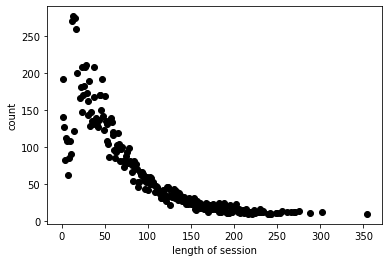

In [26]:
# sessionDFF.heNumber.value_counts().plot()
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

vc = sessionDFF.heNumber.value_counts()
plt.xlabel("length of session")
plt.ylabel("count")
x, y = vc.keys(), vc.values
ax.scatter(x, y, color='black')
plt.savefig('../data/pngs/sessionLengths.jpg')

In [57]:
sessionDFF.to_csv("../data/dataset/session.csv", encoding="utf-8")

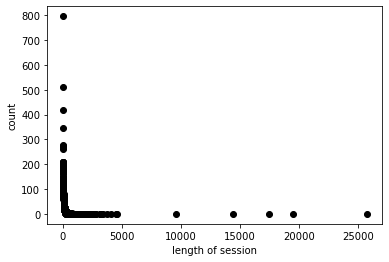

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

vc = sessionDF.heNumber.value_counts()
x, y = vc.keys(), vc.values
plt.xlabel("length of session")
plt.ylabel("count")
ax.scatter(x, y, color='black')
plt.savefig('../data/pngs/unSessionLengths.jpg')

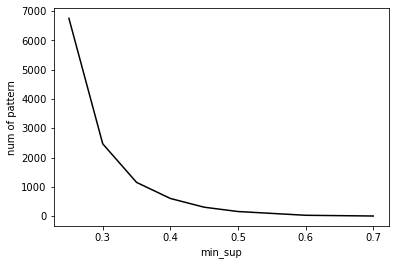

In [31]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

x = [0.7,0.6,0.5,0.45,0.4,0.35,0.3,0.25]
y = [10,35,163,310,608,1157,2472,6752]

plt.xlabel("min_sup")
plt.ylabel("num of pattern")
ax.plot(x, y, color='black')
plt.savefig('../data/pngs/minsup.jpg')